In [2]:
import os
import csv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir(os.getcwd())

In [4]:
#capture first instance of 'Result name'
##get list of files
filelist = [file for file in os.listdir() if file.endswith(".asc")]
filelist = [c for c in filelist if "_data" in c]
filelist

##name of the result list
names=[]

##for each file
for file in filelist:
    result = []
    with open(file, 'r') as f:
        lines = f.readlines()
        ##look at each line, if the line contains the phrase, keep the line the result list.
        for line in lines:
                if 'Result name: ' in line:
                    result.append(line.replace('Result name: ','').strip())
    ##take the first instance of result name and keep it.
    names.append(result[0])
names

['UP319 001',
 'UP321 002',
 'UP322 003',
 'UP323 004',
 'UP324 005',
 'UP325 006',
 'UP326 007',
 'UP327 001',
 'UP328 001',
 'UP328 002',
 'UP329 003',
 'UP330 004',
 'UP331 002',
 'UP332 003',
 'UP333 004',
 'UP334 005',
 'UP335 005',
 'UP336 006',
 'UP337 006',
 'UP338 007']

In [5]:
#input paths are PDFs in folder
filelist = [file for file in os.listdir() if file.endswith(".asc")]
filelist = [c for c in filelist if "chrom" in c]
filelist

['UP319 001_chrom.asc',
 'UP321 002_chrom.asc',
 'UP322 003_chrom.asc',
 'UP323 004_chrom.asc',
 'UP324 005_chrom.asc',
 'UP325 006_chrom.asc',
 'UP326 007_chrom.asc',
 'UP327 001_chrom.asc',
 'UP328 001_chrom.asc',
 'UP328 002_chrom.asc',
 'UP329 003_chrom.asc',
 'UP330 004_chrom.asc',
 'UP331 002_chrom.asc',
 'UP332 003_chrom.asc',
 'UP333 004_chrom.asc',
 'UP334 005_chrom.asc',
 'UP335 005_chrom.asc',
 'UP336 006_chrom.asc',
 'UP337 006_chrom.asc',
 'UP338 007_chrom.asc']

In [6]:
UVtrace = pd.read_csv(filelist[0], sep='\t', header = 1)
UVtrace

,UV 1_280,Unnamed: 1,Cond,Unnamed: 3,Conc B,Unnamed: 5,Fraction,Unnamed: 7,PreC pressure,Unnamed: 9,DeltaC pressure,Unnamed: 11,Unnamed: 12
0,ml,mAU,ml,mS/cm,ml,%,ml,Fraction,ml,MPa,ml,MPa,NaN
1,-7.595,1.887783,-7.595,2.702077,-7.595,0,74.83453,1.A.1,-7.595,0.002121076,-7.595,0.003672368,NaN
2,-7.587,1.887783,-7.58,2.702077,-7.52,0,89.82886,1.A.2,-7.52,0.002121076,-7.52,0.003672368,NaN
3,-7.58,26.43252,-7.565,2.707511,-7.444,0,94.95897,Waste(Frac),-7.444,0.2176655,-7.444,0.03386363,NaN
4,-7.572,25.91832,-7.55,2.693006,-7.369,0,NaN,NaN,-7.369,0.2262102,-7.369,0.02171356,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16051,113.325,0.4830628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16052,113.332,0.4834166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16053,113.34,0.4835201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16054,113.348,0.483746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
##set figure size and style
sns.set(rc={'figure.figsize':(6,3)})
#sns.set_theme(style='white', context='paper')
sns.set_style('white', {'axes.linewidth': 0.5})
sns.set_context('paper')

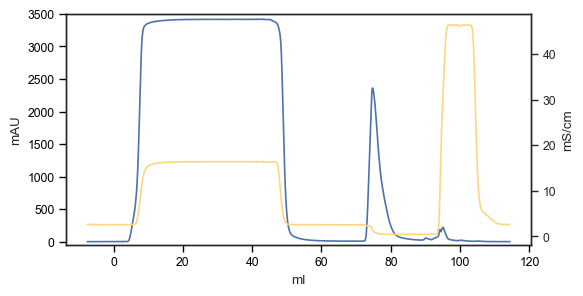

In [8]:
##graph file names
png_name = pd.DataFrame(data=[names], columns = filelist)

##for each file
for file in filelist:
    ##clear chromatogram
    plt.clf()
    
    ##read the trace from the chromatogram file
    UVtrace = pd.read_csv(file, sep='\t', header = 1)
    UVtrace = UVtrace.iloc[:, 0:4]
    UVtrace.columns = UVtrace.iloc[0]
    UVtrace = UVtrace.tail(-1)
    UVtrace = UVtrace.astype(float)
    
    ##plot using seaborn
    ax = sns.lineplot(data=UVtrace.iloc[:,0:2], x='ml', y='mAU', color="b", legend='auto')
    ax.set_ylim([-50,3500])
    ax2 = plt.twinx()
    sns.lineplot(data=UVtrace.iloc[:,2:5], x='ml', y='mS/cm', color="#FFD580", legend='auto', ax=ax2)
    ax.tick_params(colors='black')
    ax.tick_params(bottom=True, left=True)
    #plt.xticks(np.arange(-70, 150, 10))
    plt.xlabel('mL')
    
    #save file
    plt.savefig(fname=png_name[file].values[0]+'.png', dpi=300 )
    

ax = sns.lineplot(data=df_subset_long, x='ml', y='value', hue='variable', dashes=False, legend='auto')
ax.tick_params(colors='black')
ax.tick_params(bottom=True, left=True)
#plt.xticks(np.arange(0, 15, 1))
#plt.xlabel('Minutes')
#plt.ylabel('A280')
#plt.savefig(fname='Overlaid.png', dpi=300 )

ax = sns.lineplot(data=df_subset_long, x='Time', y='A280', hue='Sample', dashes=False, legend='auto')
ax.tick_params(colors='black')
ax.tick_params(bottom=True, left=True)
plt.xticks(np.arange(0, 10, 0.2))
ax.set_xlim([5,9])
ax.set_ylim([-.05,.3])
plt.xlabel('Minutes')
plt.ylabel('A280')
plt.legend(loc='upper right')
plt.savefig(fname='zoom.png', dpi=300 )

plt.clf()
ax = sns.lineplot(data=UVtrace.iloc[:,0:2], x='ml', y='mAU', color="b", legend='auto')
ax2 = plt.twinx()
sns.lineplot(data=UVtrace.iloc[:,2:5], x='ml', y='mS/cm', color="#FFD580", legend='auto', ax=ax2)
ax.tick_params(colors='black')
ax.tick_params(bottom=True, left=True)
ax.set_xlim([200,900])
#plt.xticks(np.arange(-70, 150, 10))
plt.xlabel('mL')
plt.savefig(fname='zoom.png', dpi=300 )

##set the X_limits in mls, and fraction collection offset volume
X_limits=[0,2000]
offset=[200]

##graph file names
png_name = pd.DataFrame(data=[names], columns = filelist)

##for each file
for file in filelist:
    ##clear chromatogram
    plt.clf()
    
    ##read the trace from the chromatogram file
    UVtrace = pd.read_csv(file, sep='\t', header = 1)
    UVtrace = UVtrace.iloc[:, 0:4]
    UVtrace.columns = UVtrace.iloc[0]
    UVtrace = UVtrace.tail(-1)
    UVtrace = UVtrace.astype(float)
    
    ##read the fraction annotation from the chromatogram file
    fraction = pd.read_csv(file, sep='\t', header = 2)
    fraction = fraction[['ml.3','Fraction']].dropna()
    fraction['ml_mark']=fraction['ml.3']-offset
    fraction = fraction[fraction['ml_mark']>X_limits[0]]
    fraction = fraction[fraction['ml_mark']<X_limits[1]]
    fracton = fraction.reset_index(inplace=True, drop=True)
    
    ##plot using seaborn
    ax = sns.lineplot(data=UVtrace.iloc[:,0:2], x='ml', y='mAU', color="b", legend='auto')
    for i, label in enumerate(fraction['Fraction']):
        plt.text(fraction['ml_mark'][i], y=ax.get_ylim()[0], s='-'+label, ha="center", va="bottom", rotation='vertical')
    ax2 = plt.twinx()
    sns.lineplot(data=UVtrace.iloc[:,2:5], x='ml', y='mS/cm', color="#FFD580", legend='auto', ax=ax2)
    ax.tick_params(colors='black')
    ax.tick_params(bottom=True, left=True)
    #ax.set_xlim(X_limits)
    #plt.xticks(np.arange(-70, 150, 10))
    plt.xlabel('mL')

    
    
    #save file
    plt.savefig(fname=png_name[file].values[0]+'.png', dpi=300 )